In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc

rc('axes', **{
    'titlesize': 9,
    'labelsize': 9,
    'linewidth': 0.2
})

rc('font', **{
    'family':'sans-serif',
    'sans-serif':['Computer Modern serif']
})

rc('legend', **{
    'fontsize': 7,
    'edgecolor': 'white'
})

rc('figure', **{
    'dpi': 200
})

/conda/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


CIS
Index(['Run', 'CIS', 'PP', 'RR', 'SP', 'OUTCLASS', 'Edges'], dtype='object')
Index(['Iteration', 'CIS', 'RR', 'SP', 'PP', 'OUTCLASS', 'Edges'], dtype='object')
RR
Index(['Run', 'CIS', 'PP', 'RR', 'SP', 'OUTCLASS', 'Edges'], dtype='object')
Index(['Iteration', 'CIS', 'RR', 'SP', 'PP', 'OUTCLASS', 'Edges'], dtype='object')
SP
Index(['Run', 'CIS', 'PP', 'RR', 'SP', 'OUTCLASS', 'Edges'], dtype='object')
Index(['Iteration', 'CIS', 'RR', 'SP', 'PP', 'OUTCLASS', 'Edges'], dtype='object')
PP
Index(['Run', 'CIS', 'PP', 'RR', 'SP', 'OUTCLASS', 'Edges'], dtype='object')
Index(['Iteration', 'CIS', 'RR', 'SP', 'PP', 'OUTCLASS', 'Edges'], dtype='object')


/conda/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


All done, folks!


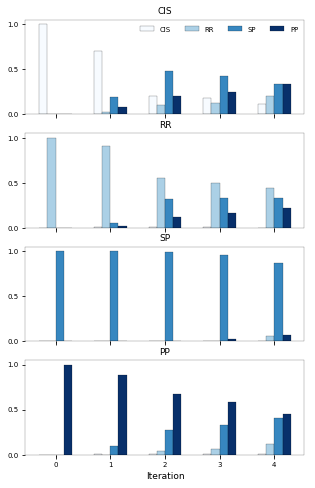

In [4]:
path = '{}/{}/{}/results_{}.csv'
result_image = 'plots-web/{}.png'
methods = (
    ('normal', 'normal'),
    #('random_normal', 'normal/random-expectation'),
    #('fixed-structure', 'fixed-structure'),
    #('random_fixed-structure', 'fixed-structure/random-expectation')
)

#with open('asp_programs.txt') as fin: asp_programs = [x.strip() for x in fin]
asp_programs = ('clique',)
classes_dataset = ('CIS', 'RR', 'SP', 'PP')

for asp_prog in asp_programs:
    # x=8 se plottiamo anche i random, altrimenti x=4
    res = np.array(plt.subplots(4, 1, sharex=True))
    fig, axes = res[0], res[1]
    axes.flatten()
    
    ax_index = 0
    for c, class_dataset in enumerate(classes_dataset):
        for m, (method, directory) in enumerate(methods):
            df = pd.DataFrame.from_csv(path.format(directory, asp_prog, class_dataset, asp_prog), sep=';')

            # removing patients with incorrect prediction at the first time step
            miss_classified = df[(df.Run == 0) & (df.OUTCLASS != class_dataset)].index.values.tolist()
            for miss in miss_classified:
                df = df[~df.index.str.contains(miss)]
                
            # remove patients with incorrect prediction after the first time step
            cis_run = set(df[(df.Run == 0) & (df.OUTCLASS == class_dataset)].index.values.tolist())
            for i in range(1,5):
                cis_run = set(cis_run).difference(df[(df.Run == i) & (df.OUTCLASS != class_dataset)].index.values.tolist())
            to_remove = list(set(df[(df.Run == 4) & (df.OUTCLASS == class_dataset)].index.values.tolist()).difference(cis_run))
            for remove in to_remove:
                df = df[~df.index.str.contains(remove)]

            # saving the plot
            title = '{}{}'.format(class_dataset, '' if 'random' not in method else ' (random)')
            print(title)
            
            print(df.columns)
            df.columns = ['Iteration', 'CIS', 'PP', 'RR', 'SP', 'OUTCLASS', 'Edges']
            new_columns = ['Iteration', 'CIS', 'RR', 'SP', 'PP', 'OUTCLASS', 'Edges']
            df = df.reindex(columns=new_columns)
            print(df.columns)
            
            plot = df.drop(['Edges'], axis=1).groupby(df.Iteration).mean().drop(['Iteration'], axis=1)\
                .plot(kind='bar',
                      colormap='Blues',
                      figsize=(5, 8),
                      ax=axes[ax_index],
                      width=.6,
                      linewidth=.2,
                      edgecolor='black',
                      fontsize=7,
                      rot=0,
                      grid=False,
                      title=title);
            
            if ax_index == 0:
                axes[ax_index].legend(loc=0, ncol=4, framealpha=1, frameon=True)
            else:
                axes[ax_index].legend().remove()

            ax_index += 1
        
    fig.savefig(result_image.format(asp_prog), dpi=100, bbox_inches='tight')
        
print('All done, folks!')